# 🌫️ Day 10 Challenge: 
### "Unlocking the Secrets of Beijing's Air: A Data Science Challenge with PM2.5!"

#####  📂 Dataset: "https://www.kaggle.com/datasets/djhavera/beijing-pm25-data-data-set"

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [96]:
df = pd.read_csv("Beijing PM2.5 Data.csv")
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [97]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

# Pandas 

# Q1: Time Series Analysis: Resample the PM2.5 data to calculate the monthly average concentration and plot it.

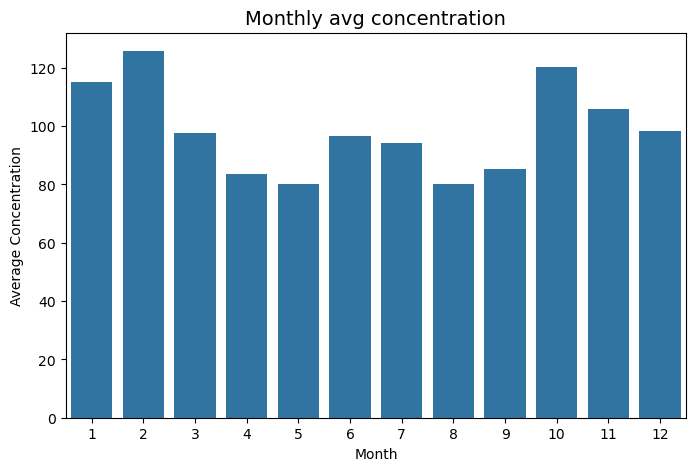

In [100]:
monthly_conc = df.groupby("month")['pm2.5'].mean().reset_index(name = 'avg_conc')
monthly_conc

plt.figure(figsize = (8,5))
sns.barplot(data = monthly_conc, x = 'month', y = 'avg_conc')
plt.title("Monthly avg concentration", fontsize = 14)
plt.xlabel("Month")
plt.ylabel("Average Concentration")
plt.show()

# Q2: Missing Values Handling: Identify columns with missing values and fill the gaps using the median value for each column.

In [102]:
missing_val = df.isnull().sum()
missing_val

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [103]:
df['pm2.5'].skew()

1.8023114189653857

In [104]:
df['pm2.5'] = df['pm2.5'].fillna(df['pm2.5'].median())

# Q3: Data Transformation: Convert the wind direction (cbwd) column into one-hot encoded features.

In [106]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [108]:
cbwd_encoded = pd.get_dummies(df['cbwd'], prefix = 'cbwd')
cbwd_encoded = cbwd_encoded.astype(int)
df = pd.concat([df, cbwd_encoded], axis = 1)
df.drop('cbwd', axis = 1, inplace = True)
df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv
0,1,2010,1,1,0,72.0,-21,-11.0,1021.0,1.79,0,0,0,1,0,0
1,2,2010,1,1,1,72.0,-21,-12.0,1020.0,4.92,0,0,0,1,0,0
2,3,2010,1,1,2,72.0,-21,-11.0,1019.0,6.71,0,0,0,1,0,0
3,4,2010,1,1,3,72.0,-21,-14.0,1019.0,9.84,0,0,0,1,0,0
4,5,2010,1,1,4,72.0,-20,-12.0,1018.0,12.97,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,231.97,0,0,0,1,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,237.78,0,0,0,1,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,242.70,0,0,0,1,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,246.72,0,0,0,1,0,0


# Visualization 

# Q1: Time Series Plot: Plot the monthly average PM2.5 levels to observe trends over the years.

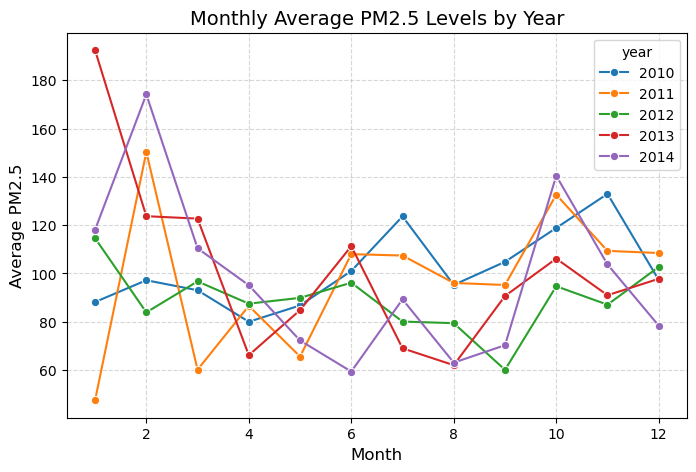

In [128]:
avg_pm = df.groupby(['year', 'month'])['pm2.5'].mean().reset_index(name = 'avg_pm2.5')

plt.figure(figsize=(8, 5))
sns.lineplot(data = avg_pm, x = 'month', y = 'avg_pm2.5', hue = 'year', marker='o', palette='tab10')
plt.title('Monthly Average PM2.5 Levels by Year', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average PM2.5', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Q2: Box Plot: Create a box plot to visualize the distribution of PM2.5 levels across different months.

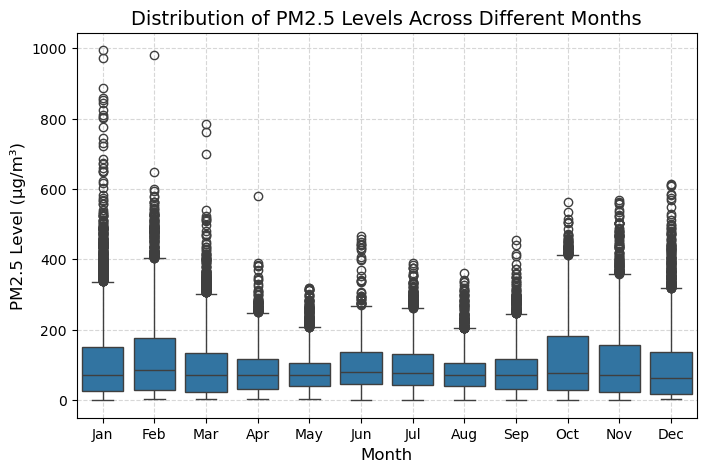

In [139]:
plt.figure(figsize=(8, 5))
sns.boxplot(data = df, x = 'month', y = 'pm2.5')
plt.title('Distribution of PM2.5 Levels Across Different Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('PM2.5 Level (µg/m³)', fontsize=12)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# EDA 

# Q1: Data Profiling: Generate a summary report for all columns, including null values, data types, and basic statistics.

In [171]:
print("General Information (Data Types, Non-null Count):")
print(df.info())
print("\n")

print(f"\nData types: \n")
print(df.dtypes)
print(f"\nBasic statistics: ")
print(df.describe())


General Information (Data Types, Non-null Count):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       43824 non-null  int64  
 1   year     43824 non-null  int64  
 2   month    43824 non-null  int64  
 3   day      43824 non-null  int64  
 4   hour     43824 non-null  int64  
 5   pm2.5    43824 non-null  float64
 6   DEWP     43824 non-null  int64  
 7   TEMP     43824 non-null  float64
 8   PRES     43824 non-null  float64
 9   Iws      43824 non-null  float64
 10  Is       43824 non-null  int64  
 11  Ir       43824 non-null  int64  
 12  cbwd_NE  43824 non-null  int32  
 13  cbwd_NW  43824 non-null  int32  
 14  cbwd_SE  43824 non-null  int32  
 15  cbwd_cv  43824 non-null  int32  
dtypes: float64(4), int32(4), int64(8)
memory usage: 4.7 MB
None



Data types: 

No           int64
year         int64
month        int64
day          int64

# Q2: Correlation Analysis: Identify highly correlated pairs (e.g., TEMP and PM2.5) and interpret the relationship.

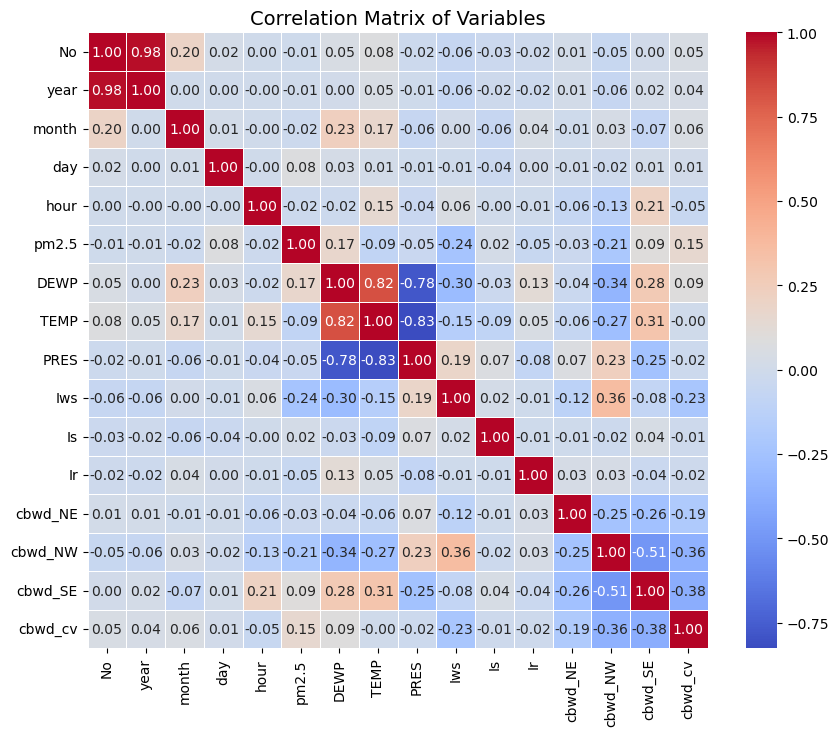

In [180]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)

plt.title("Correlation Matrix of Variables", fontsize=14)
plt.show()

In [182]:
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[(high_corr_pairs > 0.8) & (high_corr_pairs < 1)]

print("\nHighly Correlated Pairs (Correlation > 0.8):")
print(high_corr_pairs)


Highly Correlated Pairs (Correlation > 0.8):
year  No      0.979796
No    year    0.979796
DEWP  TEMP    0.824633
TEMP  DEWP    0.824633
dtype: float64


# Statistics

# Q1: Paired T-Test: Perform a paired t-test to compare the PM2.5 levels between two different months (e.g., January vs. July).

In [196]:
jan_data = df[df['month'] == 1]['pm2.5']
july_data = df[df['month'] == 7]['pm2.5']

t_stat, p_val = stats.ttest_rel(jan_data, july_data)
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant difference between PM2.5 levels in January and July.")
else:
    print("Fail to reject the null hypothesis: No significant difference between PM2.5 levels in January and July.")

T-Statistic: 7.6449
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference between PM2.5 levels in January and July.
